In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvb3Jlbi93b3JrL25vdGVzL25vdGVzLXJsL3Bvc3RzL2NvdXJzZXJh'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/home/oren/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_935340/2990395684.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.10/importlib/_bootstrap.py": 1730924533.0, "/usr/lib/python3.10/importlib/_bootstrap_external.py": 1730924533.0, "/usr/lib/python3.10/codecs.py": 1730924533.0, "/usr/lib/python3.10/encodings/aliases.py": 1730924533.0, "/usr/lib/python3.10/encodings/__init__.py": 1730924533.0, "/usr/lib/python3.10/encodings/utf_8.py": 1730924533.0, "/usr/lib/python3.10/abc.py": 1730924533.0, "/usr/lib/python3.10/io.py": 1730924533.0, "/usr/lib/python3.10/stat.py": 1730924533.0, "/usr/lib/python3.10/_collections_abc.py": 1730924533.0, "/usr/lib/python3.10/genericpath.py": 1730924533.0, "/usr/lib/python3.10/posixpath.py": 1730924533.0, "/usr/lib/python3.10/os.py": 1730924533.0, "/usr/lib/python3.10/_sitebuiltins.py": 1730924533.0, "/home/oren/.local/lib/python3.10/site-packages/_distutils_hack/__init__.py": 1720016493.4517488, "/usr/lib/python3.10/types.py": 1730924533.0, "/usr/lib/python3.10/warnings.py": 1730924533.0, "/usr/lib/python3.10/importlib/__init__.py": 1730924533.0, "/usr/li

In [2]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class RandomWalk1000(gym.Env):
    def __init__(self, num_states=1000, neighborhood_size=100, seed=None):
        super().__init__()
        self.num_states = num_states
        self.neighborhood_size = neighborhood_size
        self.observation_space = spaces.Discrete(num_states + 2) # add two states 0 and num_states + 1 as terminal states
        self.action_space = spaces.Discrete(2)  # 0 for left, 1 for right
        self.current_state = 500 # start in the middle
        self.np_random, seed = gym.utils.seeding.np_random(seed)
        self.trajectory = [500]

    def reset(self, *, seed=None, options=None):
        super().reset(seed=seed)
        self.current_state = 500
        self.trajectory = [500]
        return self.current_state, {}

    def step(self, action):

        if action == 0: # move left
             # left neighbours
            left_start = max(1, self.current_state - self.neighborhood_size)
            left_end = self.current_state
            num_left = left_end - left_start

            if left_start == 1:
                prob_terminate_left = (self.neighborhood_size - num_left) / self.neighborhood_size
            else:
                prob_terminate_left = 0
            
            if self.np_random.random() < prob_terminate_left:
               
                return 0, -1, True, False, {} # terminate left

            next_state = self.np_random.integers(low=left_start, high=left_end)


        elif action == 1: # move right
             # right neighbours
            right_start = self.current_state + 1
            right_end = min(self.num_states + 1, self.current_state + self.neighborhood_size + 1)
            num_right = right_end - right_start
            if right_end == self.num_states + 1:
                 prob_terminate_right = (self.neighborhood_size - num_right) / self.neighborhood_size
            else:
                prob_terminate_right = 0
            
            if self.np_random.random() < prob_terminate_right:

                return self.num_states + 1, 1, True, False, {} # terminate right

            next_state = self.np_random.integers(low=right_start, high=right_end)
        else:
            raise ValueError("Invalid action")

        self.current_state = next_state

        self.trajectory.append(self.current_state)
        return self.current_state, 0, False, False, {} # not terminated or truncated


import matplotlib.pyplot as plt


def plot_trajectory(trajectory, num_states):
    """Plots the trajectory of the random walk."""
    x = np.arange(len(trajectory))
    y = np.array(trajectory)
    
    plt.figure(figsize=(12, 4))
    plt.plot(x, y, marker='o', linestyle='-', markersize=3)
    plt.xlabel('Time Step')
    plt.ylabel('State')
    plt.title('Random Walk Trajectory')
    plt.yticks(np.arange(0, num_states+2, 100))
    plt.grid(axis='y')

    plt.tight_layout()
    plt.show()

State: 456, Reward: 0, Terminated: False
State: 364, Reward: 0, Terminated: False
State: 309, Reward: 0, Terminated: False
State: 261, Reward: 0, Terminated: False
State: 198, Reward: 0, Terminated: False
State: 174, Reward: 0, Terminated: False
State: 115, Reward: 0, Terminated: False
State: 109, Reward: 0, Terminated: False
State: 21, Reward: 0, Terminated: False
State: 12, Reward: 0, Terminated: False
State: 1, Reward: -1, Terminated: True


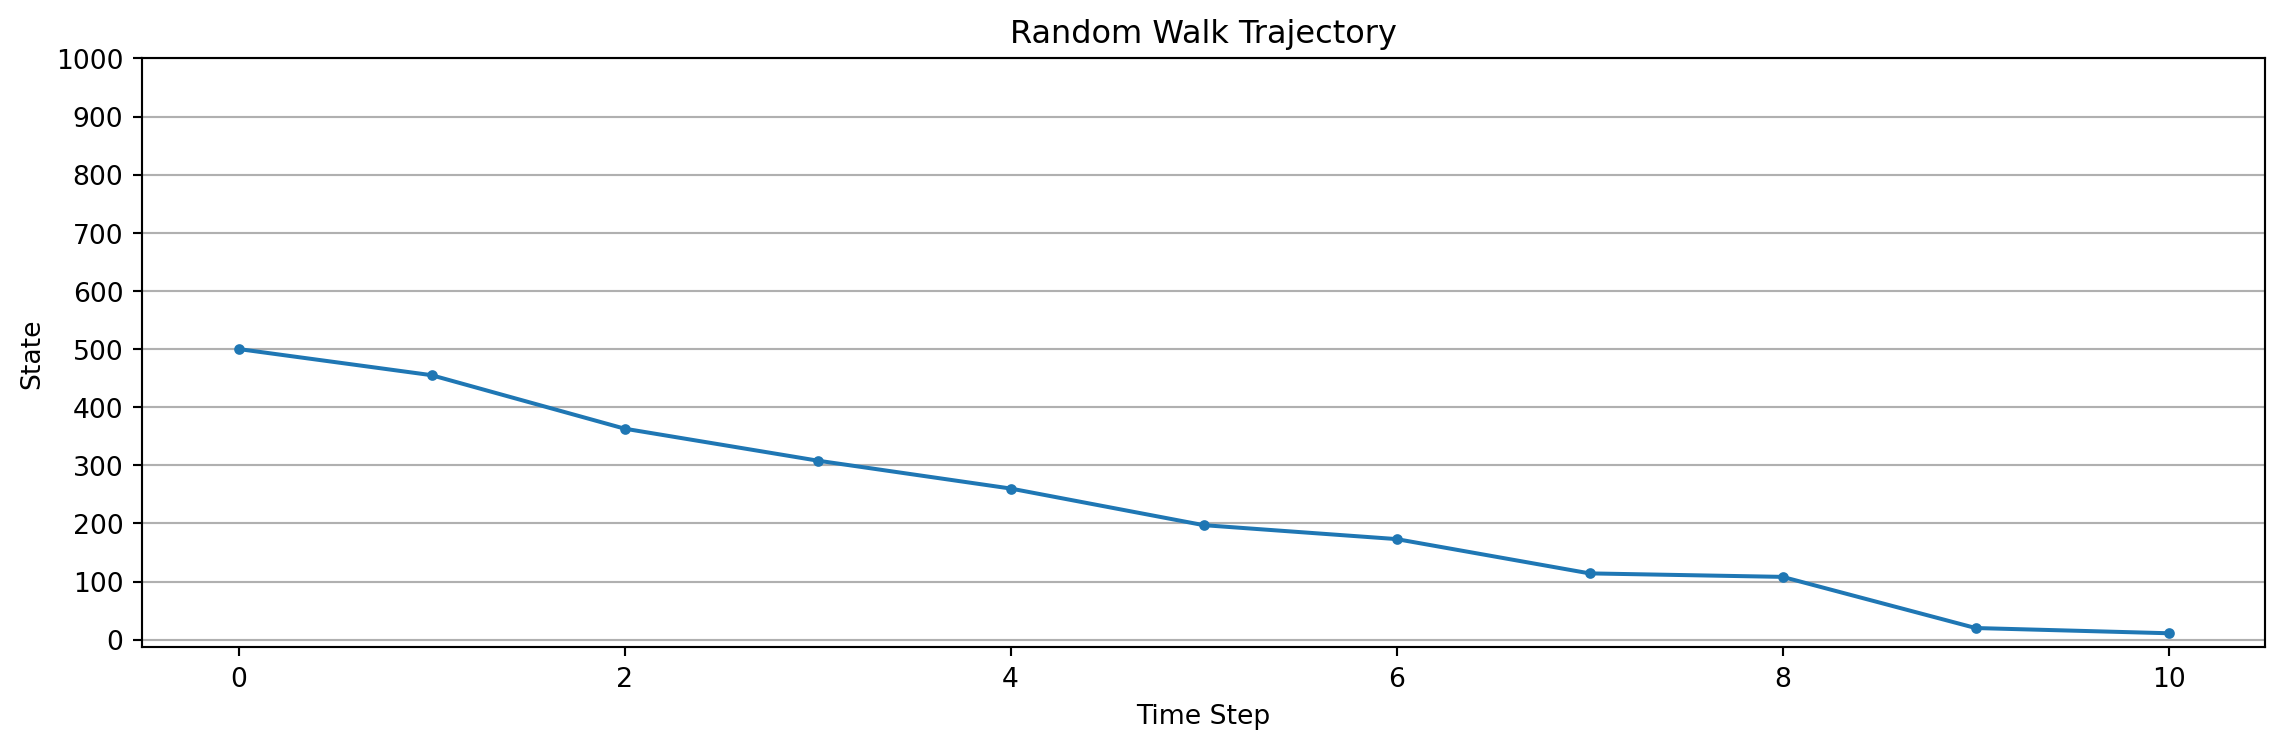

In [3]:
#import gymnasium as gym
#from random_walk_gym import RandomWalk1000

env = RandomWalk1000()

# Reset the env
obs, info = env.reset()
terminated = False

while not terminated:
    # For this environment, an action is not needed.
    # Here we pass in a dummy value
    obs, reward, terminated, truncated, info = env.step(0)
    print(f"State: {obs + 1}, Reward: {reward}, Terminated: {terminated}")

env.close()

plot_trajectory(env.trajectory, num_states=env.num_states)


obs=457, action=0, reward=0, terminated=False
obs=414, action=0, reward=0, terminated=False
obs=456, action=1, reward=0, terminated=False
obs=531, action=1, reward=0, terminated=False
obs=589, action=1, reward=0, terminated=False
obs=635, action=1, reward=0, terminated=False
obs=543, action=0, reward=0, terminated=False
obs=576, action=1, reward=0, terminated=False
obs=647, action=1, reward=0, terminated=False
obs=680, action=1, reward=0, terminated=False
obs=772, action=1, reward=0, terminated=False
obs=744, action=0, reward=0, terminated=False
obs=676, action=0, reward=0, terminated=False
obs=730, action=1, reward=0, terminated=False
obs=654, action=0, reward=0, terminated=False
obs=618, action=0, reward=0, terminated=False
obs=543, action=0, reward=0, terminated=False
obs=469, action=0, reward=0, terminated=False
obs=569, action=1, reward=0, terminated=False
obs=482, action=0, reward=0, terminated=False
obs=492, action=1, reward=0, terminated=False
obs=401, action=0, reward=0, termi

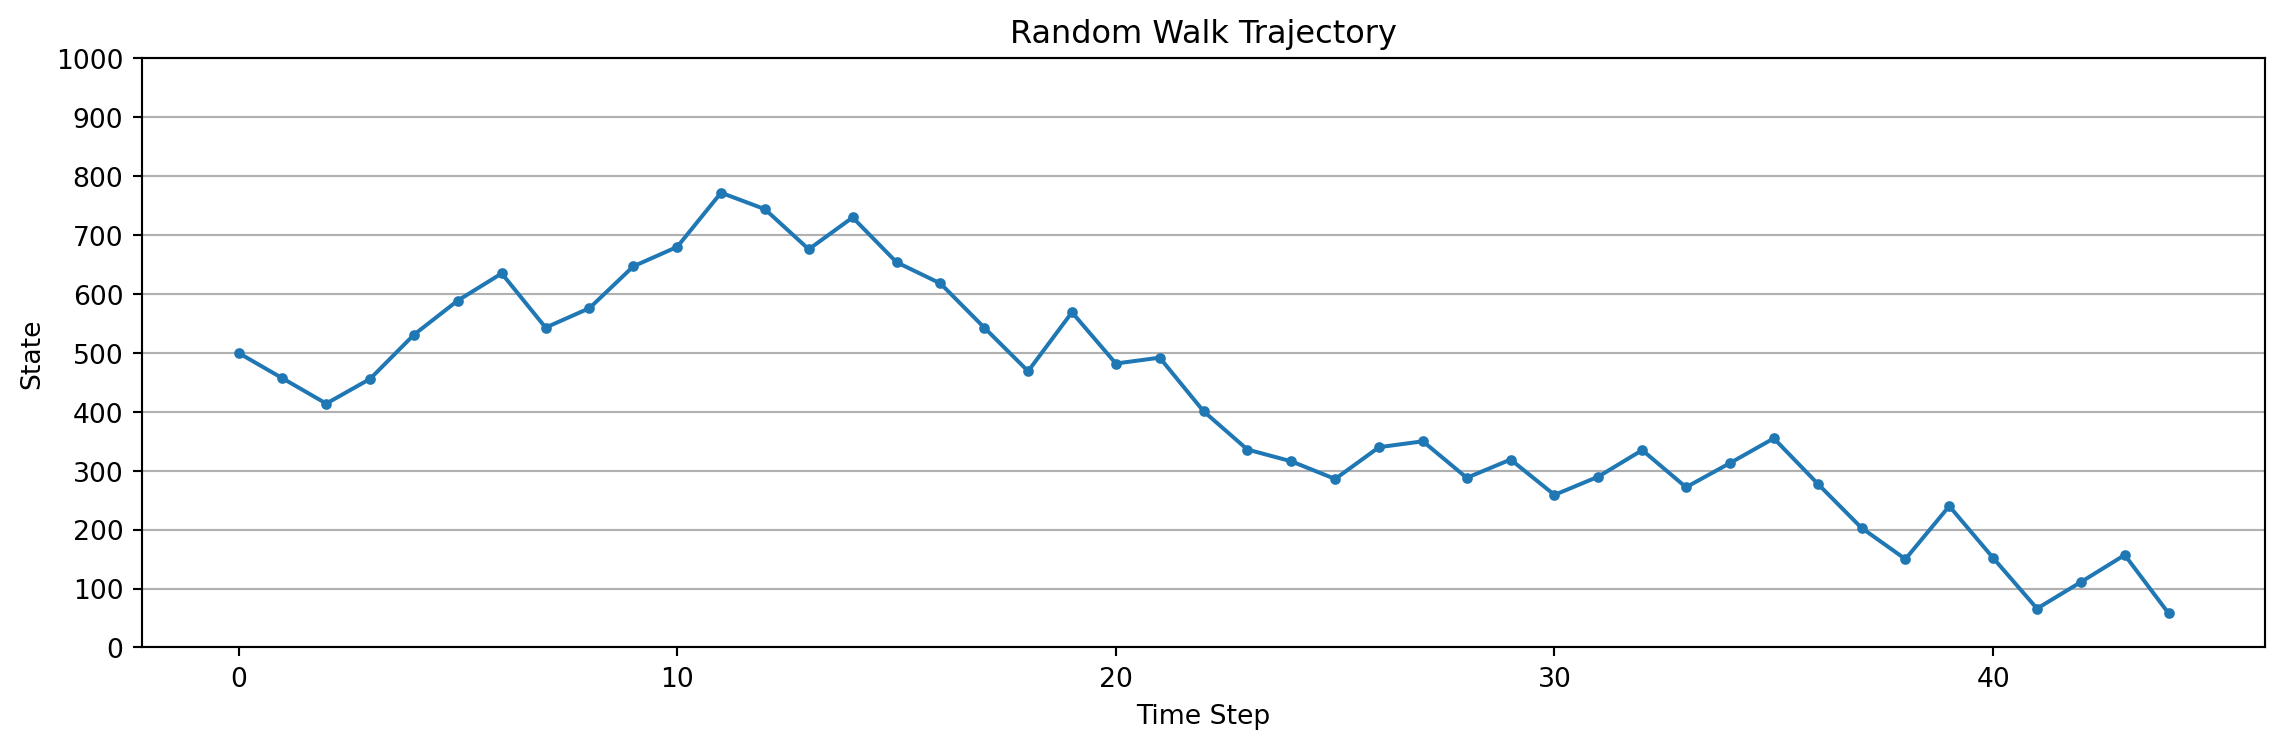

In [4]:
env = RandomWalk1000(num_states=1000, neighborhood_size=100)
obs, info = env.reset()
terminated = False
truncated = False
trajectory = []
while not terminated and not truncated:
    action = env.action_space.sample()  # Replace with your policy
    obs, reward, terminated, truncated, info = env.step(action)
    print(f'{obs=}, {action=}, {reward=}, {terminated=}')

plot_trajectory(env.trajectory, num_states=env.num_states)

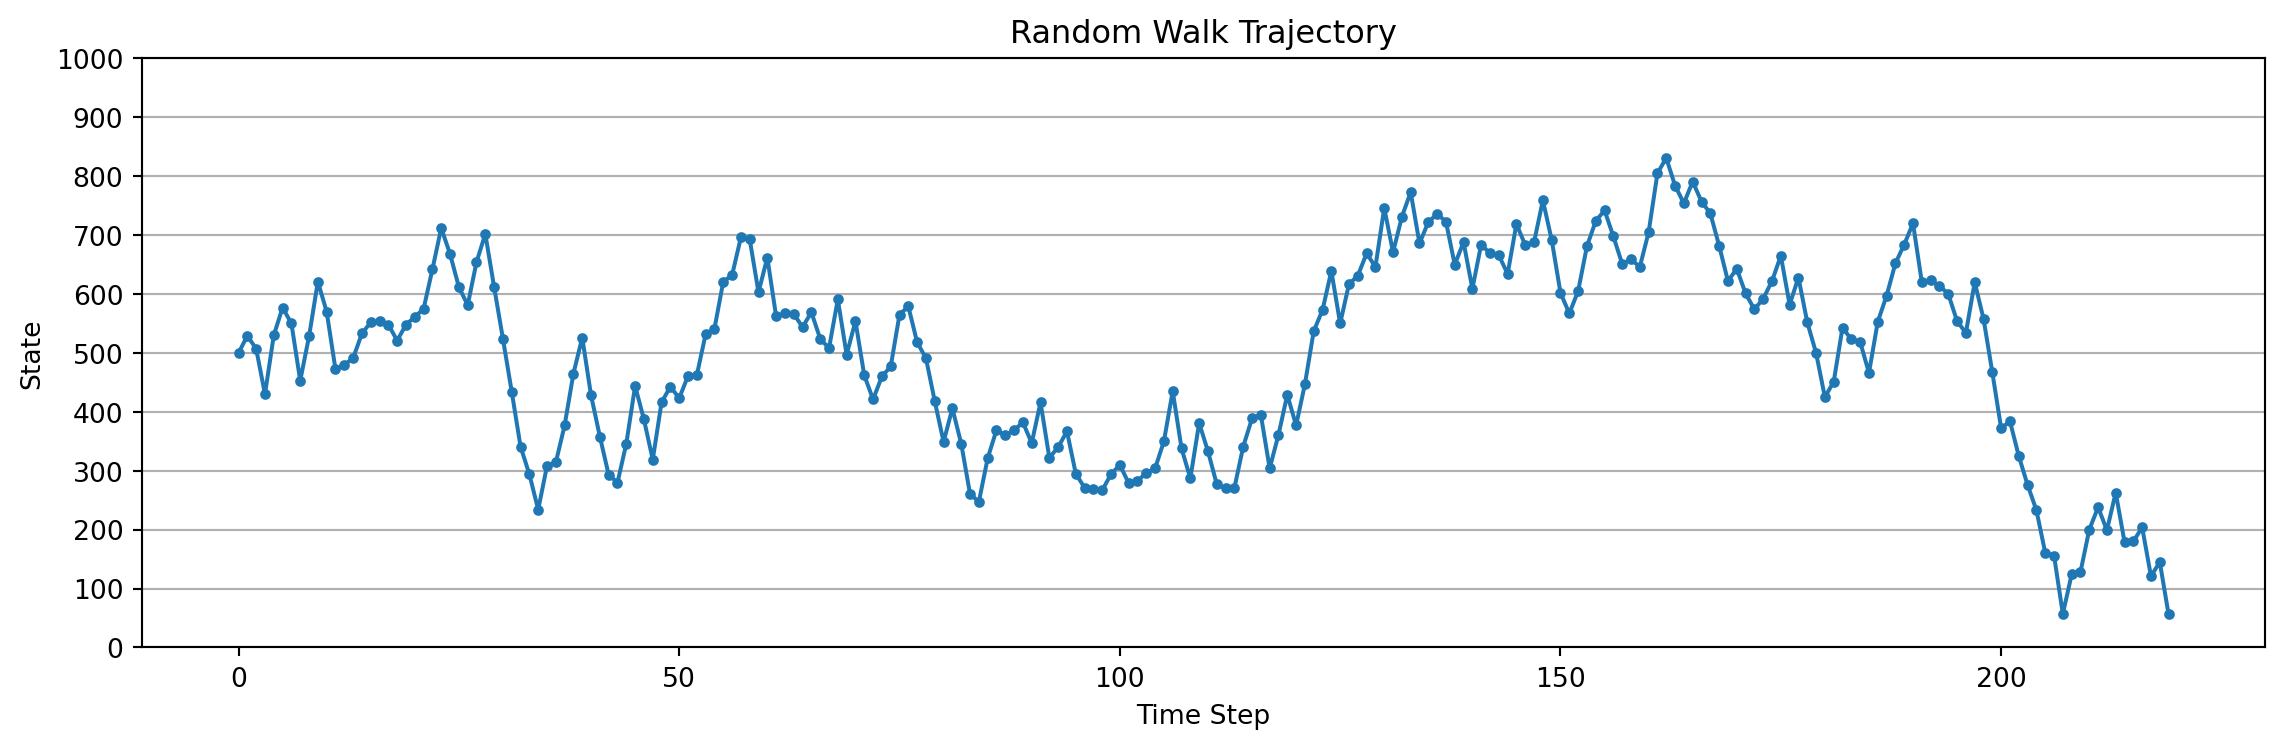

In [5]:
env = RandomWalk1000(num_states=1000, neighborhood_size=100)
obs, info = env.reset()
terminated = False
truncated = False
while not terminated and not truncated:
    action = env.action_space.sample()  # Replace with your policy
    obs, reward, terminated, truncated, info = env.step(action)


plot_trajectory(env.trajectory, num_states=env.num_states)